<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/c/dlschool-fashionmnist3. Вам нужно скачать оттуда всё из раздела `Data`, далее мы будем работать с этим - обучаться на train и предсказывать на test.</b></h3> 

<h4 style="text-align: center;"><b>Оргиниальный датасет: https://www.kaggle.com/zalando-research/fashionmnist</b></h4> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [1]:
import pandas as pd

In [2]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 784)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
image_png = plt.imread('./fpmi_logo.png')

In [14]:
image_png

array([[[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]],

       [[0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

* Посмотрим на тип загруженного объекта:

In [15]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [16]:
image_png.shape

(716, 2232, 4)

In [17]:
image_png[0].shape

(2232, 4)

In [18]:
image_png[0]

array([[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]], dtype=float32)

In [19]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [20]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [21]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

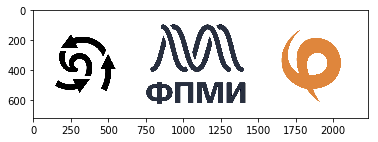

In [22]:
plt.imshow(image_png);

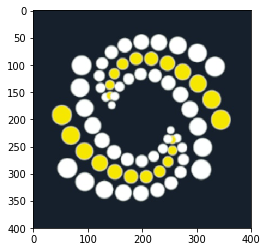

In [23]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [9]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [10]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [11]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [12]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [28]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [29]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

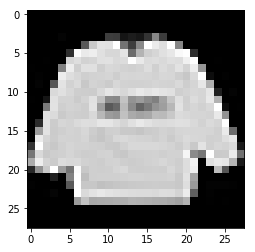

In [30]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [32]:
torch.__version__

'1.0.1.post2'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [14]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [34]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [15]:
y_train_tensor.unique()

tensor([1, 7, 8, 5, 4, 3, 0, 6, 9, 2])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [16]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [55]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [20]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [58]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 4.83777855682373
[0, 200] current loss: 4.8591286544799805
[0, 300] current loss: 4.859483921051026
[0, 400] current loss: 4.8505137901306155
[0, 500] current loss: 4.8577303771972655
[0, 600] current loss: 4.85462056350708
[0, 700] current loss: 4.871253910064698
[0, 800] current loss: 4.877690464019776
[0, 900] current loss: 4.881663200378418
[1, 100] current loss: 4.83437712097168
[1, 200] current loss: 4.84690246963501
[1, 300] current loss: 4.859758659362793
[1, 400] current loss: 4.8543605041503906
[1, 500] current loss: 4.864965843200683
[1, 600] current loss: 4.852820892333984
[1, 700] current loss: 4.870418182373047
[1, 800] current loss: 4.866510341644287
[1, 900] current loss: 4.861665073394775
[2, 100] current loss: 4.836540897369384
[2, 200] current loss: 4.849175312042236
[2, 300] current loss: 4.874750492095948
[2, 400] current loss: 4.85192021560669
[2, 500] current loss: 4.853126182556152
[2, 600] current loss: 4.8468264389038085
[2, 700] current

[22, 100] current loss: 4.826147087097168
[22, 200] current loss: 4.843009479522705
[22, 300] current loss: 4.845191291809082
[22, 400] current loss: 4.833236206054687
[22, 500] current loss: 4.842474178314209
[22, 600] current loss: 4.842234394073486
[22, 700] current loss: 4.844154479980468
[22, 800] current loss: 4.854459030151367
[22, 900] current loss: 4.8405192260742185
[23, 100] current loss: 4.8232759132385254
[23, 200] current loss: 4.834588897705078
[23, 300] current loss: 4.841828475952148
[23, 400] current loss: 4.832803649902344
[23, 500] current loss: 4.834067497253418
[23, 600] current loss: 4.828721004486084
[23, 700] current loss: 4.852428630828857
[23, 800] current loss: 4.853787246704101
[23, 900] current loss: 4.849641441345215
[24, 100] current loss: 4.820181991577148
[24, 200] current loss: 4.842169376373291
[24, 300] current loss: 4.8461056976318355
[24, 400] current loss: 4.840874782562256
[24, 500] current loss: 4.84579220199585
[24, 600] current loss: 4.831642

[43, 800] current loss: 4.843005939483643
[43, 900] current loss: 4.833013439178467
[44, 100] current loss: 4.804469276428223
[44, 200] current loss: 4.8231523208618166
[44, 300] current loss: 4.828381065368652
[44, 400] current loss: 4.825420516967774
[44, 500] current loss: 4.826751747131348
[44, 600] current loss: 4.810167964935303
[44, 700] current loss: 4.834876140594482
[44, 800] current loss: 4.843764781951904
[44, 900] current loss: 4.825470726013184
[45, 100] current loss: 4.810955661773682
[45, 200] current loss: 4.818933528900146
[45, 300] current loss: 4.8289536743164065
[45, 400] current loss: 4.819922725677491
[45, 500] current loss: 4.829363525390625
[45, 600] current loss: 4.806673038482666
[45, 700] current loss: 4.828805099487305
[45, 800] current loss: 4.838305721282959
[45, 900] current loss: 4.835608798980713
[46, 100] current loss: 4.806937099456787
[46, 200] current loss: 4.81869344329834
[46, 300] current loss: 4.832421588897705
[46, 400] current loss: 4.8239313

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [59]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 88 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 91 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 85 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [61]:
%%time
y_test_pred = net(torch.FloatTensor(X_test))

CPU times: user 592 ms, sys: 64 ms, total: 656 ms
Wall time: 1.34 s


In [62]:
y_test_pred.shape

torch.Size([10000, 10])

In [63]:
y_test_pred[:5]

tensor([[9.9981e-01, 4.9694e-29, 1.7823e-25, 1.1789e-24, 2.6459e-33, 1.7560e-24,
         1.9320e-04, 1.0090e-25, 1.7856e-25, 2.7866e-36],
        [9.7803e-34, 1.0000e+00, 7.1976e-30, 1.1064e-23, 1.1519e-22, 1.2413e-33,
         2.4033e-37, 7.8268e-30, 1.5618e-35, 2.6366e-31],
        [3.5939e-08, 3.5411e-12, 1.0000e+00, 1.1159e-14, 1.0292e-12, 2.9635e-11,
         7.9403e-10, 2.9067e-11, 8.1536e-15, 7.4345e-15],
        [1.0000e+00, 8.0494e-29, 5.3273e-12, 6.2650e-24, 0.0000e+00, 5.7920e-21,
         3.9258e-23, 1.0628e-33, 1.0424e-32, 3.6255e-27],
        [3.8365e-21, 1.2023e-18, 5.8993e-04, 3.6316e-01, 6.3625e-01, 2.0695e-14,
         7.2647e-11, 3.5397e-12, 1.5806e-19, 8.1672e-23]],
       grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [64]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([0, 1, 2,  ..., 8, 8, 4])

Сохраним в датафрейм:

In [65]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,0
1,1
2,2
3,0
4,4


In [66]:
answer_df['Id'] = answer_df.index

In [67]:
answer_df.head()

,Category,Id
0,0,0
1,1,1
2,2,2
3,0,3
4,4,4


In [68]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,6,9996
9997,8,9997
9998,8,9998
9999,4,9999


Отлично, созраним в файл и отправим:

In [69]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [19]:
def create_submission(y_test_pred, num):
    _, predicted = torch.max(y_test_pred, 1)
    answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
    answer_df['Id'] = answer_df.index
    answer_df.to_csv('./baseline' + str(num) + '.csv', index=False)

# 6 layers 300 neurons each 64-size batch 50 epochs lr 1e-04

RESULT: 0.89000

In [72]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 300, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

In [73]:
%%time
BATCH_SIZE = 64
NUM_EPOCHS = 1

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 6.190324394226074
[0, 200] current loss: 5.906044361114502
[0, 300] current loss: 5.869128673553467
[0, 400] current loss: 5.860502891540527
[0, 500] current loss: 5.86519548034668
[0, 600] current loss: 5.858341640472412
[0, 700] current loss: 5.818626537322998
[0, 800] current loss: 5.815522445678711
[0, 900] current loss: 5.825626419067383
[1, 100] current loss: 5.788535926818848
[1, 200] current loss: 5.806752349853515
[1, 300] current loss: 5.788576858520508
[1, 400] current loss: 5.7952818794250485
[1, 500] current loss: 5.810810569763183
[1, 600] current loss: 5.827996868133545
[1, 700] current loss: 5.789656177520752
[1, 800] current loss: 5.773353759765625
[1, 900] current loss: 5.7888254623413085
[2, 100] current loss: 5.7581144714355466
[2, 200] current loss: 5.781654628753662
[2, 300] current loss: 5.7705365180969235
[2, 400] current loss: 5.772638008117676
[2, 500] current loss: 5.789854839324951
[2, 600] current loss: 5.809413333892822
[2, 700] curr

[21, 900] current loss: 5.398677703857422
[22, 100] current loss: 5.31367993927002
[22, 200] current loss: 5.241243949890137
[22, 300] current loss: 5.212556758880615
[22, 400] current loss: 5.225608005523681
[22, 500] current loss: 5.2227692260742185
[22, 600] current loss: 5.224827972412109
[22, 700] current loss: 5.205695026397705
[22, 800] current loss: 5.19575082397461
[22, 900] current loss: 5.211776504516601
[23, 100] current loss: 5.194010112762451
[23, 200] current loss: 5.188278587341308
[23, 300] current loss: 5.1833496742248535
[23, 400] current loss: 5.204162715911865
[23, 500] current loss: 5.195622714996338
[23, 600] current loss: 5.2038350105285645
[23, 700] current loss: 5.181006244659423
[23, 800] current loss: 5.19100887298584
[23, 900] current loss: 5.204219226837158
[24, 100] current loss: 5.185978790283203
[24, 200] current loss: 5.1771474342346195
[24, 300] current loss: 5.173421676635742
[24, 400] current loss: 5.179296993255615
[24, 500] current loss: 5.1901365

[43, 600] current loss: 5.122774208068848
[43, 700] current loss: 5.111224601745605
[43, 800] current loss: 5.112190647125244
[43, 900] current loss: 5.138252880096435
[44, 100] current loss: 5.108429443359375
[44, 200] current loss: 5.1207417984008785
[44, 300] current loss: 5.110500392913818
[44, 400] current loss: 5.123739490509033
[44, 500] current loss: 5.126409122467041
[44, 600] current loss: 5.122114086151123
[44, 700] current loss: 5.113995426177978
[44, 800] current loss: 5.103451713562012
[44, 900] current loss: 5.133968444824219
[45, 100] current loss: 5.1149954452514645
[45, 200] current loss: 5.112858856201172
[45, 300] current loss: 5.106965522766114
[45, 400] current loss: 5.1229067840576175
[45, 500] current loss: 5.124750778198242
[45, 600] current loss: 5.123790256500244
[45, 700] current loss: 5.11139836883545
[45, 800] current loss: 5.102549209594726
[45, 900] current loss: 5.131286346435547
[46, 100] current loss: 5.1121539115905765
[46, 200] current loss: 5.11560

In [74]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 97 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 87 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 91 %
Accuracy of Sandal : 99 %
Accuracy of Shirt :  0 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %


In [77]:
%%time
y_test_pred = net(torch.FloatTensor(X_test))
create_submission(y_test_pred, 1)

CPU times: user 608 ms, sys: 36 ms, total: 644 ms
Wall time: 406 ms


# 6 layers 300 neurons each 64-size batch 50 epochs lr 1e-04

RESULT: 0.89000

In [110]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 512, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, 26**2),
    torch.nn.ReLU(),
    torch.nn.Linear(26**2, 24**2),
    torch.nn.ReLU(),
    torch.nn.Linear(24**2, 10**2),
    torch.nn.ReLU(),
    torch.nn.Linear(10**2, 8**2),
    torch.nn.ReLU(),
    torch.nn.Linear(8**2, D_out),
    torch.nn.Softmax()
)

In [113]:
%%time
BATCH_SIZE = 32
NUM_EPOCHS = 20

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-6
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 2.8319432392120363
[0, 200] current loss: 2.822557628631592
[0, 300] current loss: 2.8545734424591065
[0, 400] current loss: 2.858660541534424
[0, 500] current loss: 2.831114912033081
[0, 600] current loss: 2.8231159057617186
[0, 700] current loss: 2.8529037532806396
[0, 800] current loss: 2.8439777545928955
[0, 900] current loss: 2.84961346244812
[0, 1000] current loss: 2.8341423778533934
[0, 1100] current loss: 2.8263437595367433
[0, 1200] current loss: 2.8571161670684813
[0, 1300] current loss: 2.838843204498291
[0, 1400] current loss: 2.8469231338500975
[0, 1500] current loss: 2.8399339294433594
[0, 1600] current loss: 2.8468408184051515
[0, 1700] current loss: 2.8451241970062258
[0, 1800] current loss: 2.8427805824279786
[1, 100] current loss: 2.8316656761169434
[1, 200] current loss: 2.8214077529907224
[1, 300] current loss: 2.8532915687561036
[1, 400] current loss: 2.8578501472473143
[1, 500] current loss: 2.830705635070801
[1, 600] current loss: 2.8223899

[10, 1600] current loss: 2.8440187549591065
[10, 1700] current loss: 2.842259422302246
[10, 1800] current loss: 2.8405447731018065
[11, 100] current loss: 2.828701147079468
[11, 200] current loss: 2.817165153503418
[11, 300] current loss: 2.849862831115723
[11, 400] current loss: 2.852832483291626
[11, 500] current loss: 2.828066831588745
[11, 600] current loss: 2.8193606243133544
[11, 700] current loss: 2.849434144973755
[11, 800] current loss: 2.840683620452881
[11, 900] current loss: 2.845668888092041
[11, 1000] current loss: 2.828828716278076
[11, 1100] current loss: 2.82291339302063
[11, 1200] current loss: 2.8542508354187013
[11, 1300] current loss: 2.836033670425415
[11, 1400] current loss: 2.8441034202575683
[11, 1500] current loss: 2.835150001525879
[11, 1600] current loss: 2.843764747619629
[11, 1700] current loss: 2.8419667415618894
[11, 1800] current loss: 2.8403109169006346
[12, 100] current loss: 2.8284369678497314
[12, 200] current loss: 2.8168135623931887
[12, 300] curr

In [114]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

sum = 0
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    sum+= 100 * class_correct[i] / class_total[i]
print("overall:", sum/10)

Accuracy of T-shirt/top : 87 %
Accuracy of Trouser : 95 %
Accuracy of Pullover : 82 %
Accuracy of Dress : 89 %
Accuracy of  Coat : 81 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 60 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag :  0 %
Accuracy of Ankle boot :  0 %
overall: 69.11666666666666


In [104]:
%%time
y_test_pred = net(torch.FloatTensor(X_test))
create_submission(y_test_pred, 2)

CPU times: user 1.8 s, sys: 196 ms, total: 1.99 s
Wall time: 23.6 s


# Whole night test

In [147]:
def write_report(it, class_correct, class_total, H, lr, batch, proc):
    f = open("report" + str(it) + ".txt","w+")
    f.write("iteration: %d \n" % it)
    f.write("Hidden: %d \n" % H)
    f.write("Lr: %e \n" % lr)
    f.write("batch: %d \n" % batch)
    f.write("\n")
    sum = 0
    for i in range(10):
        f.write('Accuracy of %5s : %2d %% \n' % (
                classes[i], 100 * class_correct[i] / class_total[i]))
        sum += 100 * class_correct[i] / class_total[i]
    f.write("overall: " + str(sum/10))
    for i in proc:
        f.write(str(i) + "\n")
    f.close()
    return sum/10

In [146]:
write_report(32, class_correct, class_total, 24, 1e-06, 12,[])

57.65833333333334

In [152]:
%%time
H_bunch = [24]
lr_bunch = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
batch_bunch = [8, 16, 32, 64, 128, 256]

NUM_EPOCHS = 40
it = 1
BEST_ACC = 0
BEST_IT = 0

for H in H_bunch:
    for lr in lr_bunch:
        for BATCH_SIZE in batch_bunch:
            proc = []
            D_in, D_out = 784, 10
            net = torch.nn.Sequential(
            torch.nn.Linear(D_in, H**2),
            torch.nn.ReLU(),
            torch.nn.Linear(H**2, int(H / 2)**2),
            torch.nn.ReLU(),
            torch.nn.Linear(int(H / 2)**2, int(H / 3)**2),
            torch.nn.ReLU(),
            torch.nn.Linear(int(H / 3)**2, int(H / 4)**2),
            torch.nn.ReLU(),
            torch.nn.Linear(int(H / 4)**2, int(H / 6)**2),
            torch.nn.ReLU(),
            torch.nn.Linear(int(H / 6)**2, D_out),
            torch.nn.Softmax()
            )
            

            loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

            learning_rate = lr
            optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

            for epoch_num  in range(NUM_EPOCHS):
                iter_num = 0
                running_loss = 0.0
                for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):

                    y_pred = net(X_batch)

                    loss = loss_fn(y_pred, y_batch)

                    running_loss += loss.item()

                    optimizer.zero_grad()

                    loss.backward()

                    optimizer.step()

                    iter_num += 1
                if iter_num % 100 == 99:
                    proc.append(running_loss / 2000)
                    running_loss = 0.0
                    
            class_correct = list(0. for i in range(10))
            class_total = list(0. for i in range(10))

            classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

            with torch.no_grad():
                for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
                    y_pred = net(X_batch)
                    _, predicted = torch.max(y_pred, 1)
                    c = (predicted == y_batch).squeeze()
                    for i in range(len(y_pred)):
                        label = y_batch[i]
                        class_correct[label] += c[i].item()
                        class_total[label] += 1
            y_test_pred = net(torch.FloatTensor(X_test))
            create_submission(y_test_pred, it)
            over = write_report(it, class_correct, class_total, H, lr, BATCH_SIZE, proc)
            print(it)
            if(over > BEST_ACC):
                BEST_ACC = over
                BEST_IT = it
                print("BEST ITERATION FOUND!!! SCORE: ", BEST_ACC)
            it += 1

1
BEST ITERATION FOUND!!! SCORE:  60.848333333333336
2
3
BEST ITERATION FOUND!!! SCORE:  64.05166666666666
4
5
6
7
BEST ITERATION FOUND!!! SCORE:  75.11833333333333
8
9
10
11
12
13
BEST ITERATION FOUND!!! SCORE:  83.73833333333333
14
15
16
17
BEST ITERATION FOUND!!! SCORE:  86.13500000000002
18
19
20
21
22
23
24
25
26
27
28
29
30
CPU times: user 13h 38min 2s, sys: 2min 39s, total: 13h 40min 41s
Wall time: 4h 37min 2s


In [153]:
print(BEST_ACC, BEST_IT)

86.13500000000002 17


# Final attempt 6 layers 300 neurons each 64-size batch 50 epochs lr 1e-04

RESULT: 0.89000

In [17]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 1024, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, int(H/2)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/2), int(H/4)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/4), int(H/8)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/8), int(H/16)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/16), int(H/32)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/32), int(H/64)),
    torch.nn.ReLU(),
    torch.nn.Linear(int(H/64), D_out),
    torch.nn.Softmax()
)

In [22]:
%%time
BATCH_SIZE = 32
NUM_EPOCHS = 200

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
    with torch.no_grad():
        for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
            y_pred = net(X_batch)
            _, predicted = torch.max(y_pred, 1)
            c = (predicted == y_batch).squeeze()
            for i in range(len(y_pred)):
                label = y_batch[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    sum = 0
    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
        sum+= 100 * class_correct[i] / class_total[i]
    print("overall:", sum/10)

[0, 100] current loss: 2.9598693561553957
[0, 200] current loss: 2.9677581577301027
[0, 300] current loss: 2.949913064956665
[0, 400] current loss: 2.929131008148193
[0, 500] current loss: 2.937423868179321
[0, 600] current loss: 2.9480480976104735
[0, 700] current loss: 2.9373051891326902
[0, 800] current loss: 2.935397470474243
[0, 900] current loss: 2.9550945281982424
[0, 1000] current loss: 2.9243810844421385
[0, 1100] current loss: 2.911986217498779
[0, 1200] current loss: 2.962166591644287
[0, 1300] current loss: 2.9359670162200926
[0, 1400] current loss: 2.926945812225342
[0, 1500] current loss: 2.9296164722442626
[0, 1600] current loss: 2.8944910354614257
[0, 1700] current loss: 2.934394779205322
[0, 1800] current loss: 2.9155705947875976
Accuracy of T-shirt/top : 83 %
Accuracy of Trouser : 87 %
Accuracy of Pullover : 68 %
Accuracy of Dress :  0 %
Accuracy of  Coat : 49 %
Accuracy of Sandal :  0 %
Accuracy of Shirt : 43 %
Accuracy of Sneaker : 87 %
Accuracy of   Bag : 94 %
Accu

[8, 100] current loss: 2.813946548461914
[8, 200] current loss: 2.8525316295623777
[8, 300] current loss: 2.837511377334595
[8, 400] current loss: 2.834797340393066
[8, 500] current loss: 2.835883674621582
[8, 600] current loss: 2.8401525650024415
[8, 700] current loss: 2.8259491214752197
[8, 800] current loss: 2.823908311843872
[8, 900] current loss: 2.84396688079834
[8, 1000] current loss: 2.825143966674805
[8, 1100] current loss: 2.8114095764160156
[8, 1200] current loss: 2.861629077911377
[8, 1300] current loss: 2.8441957836151124
[8, 1400] current loss: 2.8347144088745115
[8, 1500] current loss: 2.842169153213501
[8, 1600] current loss: 2.814096279144287
[8, 1700] current loss: 2.8413363170623778
[8, 1800] current loss: 2.8221602115631104
Accuracy of T-shirt/top : 92 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 91 %
Accuracy of Dress :  0 %
Accuracy of  Coat : 58 %
Accuracy of Sandal :  0 %
Accuracy of Shirt : 49 %
Accuracy of Sneaker : 95 %
Accuracy of   Bag : 96 %
Accurac

Accuracy of T-shirt/top : 81 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 84 %
Accuracy of Dress : 83 %
Accuracy of  Coat : 82 %
Accuracy of Sandal :  0 %
Accuracy of Shirt : 66 %
Accuracy of Sneaker : 90 %
Accuracy of   Bag : 95 %
Accuracy of Ankle boot : 98 %
overall: 78.06166666666667
[16, 100] current loss: 2.6734845790863035
[16, 200] current loss: 2.686577169418335
[16, 300] current loss: 2.670518867492676
[16, 400] current loss: 2.668534936904907
[16, 500] current loss: 2.6817152767181396
[16, 600] current loss: 2.677987710952759
[16, 700] current loss: 2.6842796096801758
[16, 800] current loss: 2.6657095642089845
[16, 900] current loss: 2.6859400520324708
[16, 1000] current loss: 2.673254379272461
[16, 1100] current loss: 2.6644542236328124
[16, 1200] current loss: 2.7055900173187255
[16, 1300] current loss: 2.6741845054626463
[16, 1400] current loss: 2.6872482395172117
[16, 1500] current loss: 2.6972304267883302
[16, 1600] current loss: 2.667925382614136
[16, 1700] curr

[23, 1100] current loss: 2.509559215545654
[23, 1200] current loss: 2.523383134841919
[23, 1300] current loss: 2.5202273178100585
[23, 1400] current loss: 2.5227741680145264
[23, 1500] current loss: 2.5248062858581544
[23, 1600] current loss: 2.5138731670379637
[23, 1700] current loss: 2.530804281234741
[23, 1800] current loss: 2.5221556034088133
Accuracy of T-shirt/top : 88 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 73 %
Accuracy of Dress : 86 %
Accuracy of  Coat : 84 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 74 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 91 %
overall: 88.56333333333335
[24, 100] current loss: 2.521630548477173
[24, 200] current loss: 2.5153438320159913
[24, 300] current loss: 2.5143230991363525
[24, 400] current loss: 2.5242940406799317
[24, 500] current loss: 2.5132344875335693
[24, 600] current loss: 2.515620153427124
[24, 700] current loss: 2.5362646350860594
[24, 800] current loss: 2.5039615421295167
[24, 900] cur

[31, 300] current loss: 2.501138879776001
[31, 400] current loss: 2.504365249633789
[31, 500] current loss: 2.492558530807495
[31, 600] current loss: 2.5041117401123048
[31, 700] current loss: 2.50974542427063
[31, 800] current loss: 2.486888301849365
[31, 900] current loss: 2.505800947189331
[31, 1000] current loss: 2.5116848163604737
[31, 1100] current loss: 2.4914458236694337
[31, 1200] current loss: 2.4997939891815184
[31, 1300] current loss: 2.488257890701294
[31, 1400] current loss: 2.5135619583129882
[31, 1500] current loss: 2.5042689476013185
[31, 1600] current loss: 2.493473403930664
[31, 1700] current loss: 2.495901168823242
[31, 1800] current loss: 2.50873278427124
Accuracy of T-shirt/top : 77 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 71 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 87 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 80 %
Accuracy of Sneaker : 95 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 97 %
overall: 89.275
[32, 100] current loss: 2.4978

[39, 100] current loss: 2.4887704372406008
[39, 200] current loss: 2.485156394958496
[39, 300] current loss: 2.478473201751709
[39, 400] current loss: 2.482827533721924
[39, 500] current loss: 2.4794591979980467
[39, 600] current loss: 2.4786030559539793
[39, 700] current loss: 2.494930950164795
[39, 800] current loss: 2.470588733673096
[39, 900] current loss: 2.492991132736206
[39, 1000] current loss: 2.4759519996643067
[39, 1100] current loss: 2.4806000175476073
[39, 1200] current loss: 2.48150429725647
[39, 1300] current loss: 2.497772394180298
[39, 1400] current loss: 2.4981042213439943
[39, 1500] current loss: 2.4975283908843995
[39, 1600] current loss: 2.4802746238708497
[39, 1700] current loss: 2.486739309310913
[39, 1800] current loss: 2.4869371337890627
Accuracy of T-shirt/top : 85 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 75 %
Accuracy of Dress : 90 %
Accuracy of  Coat : 83 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 81 %
Accuracy of Sneaker : 97 %
Accuracy of  

[46, 1800] current loss: 2.4728008251190188
Accuracy of T-shirt/top : 88 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 79 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 81 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 78 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 90.94999999999999
[47, 100] current loss: 2.4761273403167725
[47, 200] current loss: 2.468827283859253
[47, 300] current loss: 2.4683268394470215
[47, 400] current loss: 2.487202341079712
[47, 500] current loss: 2.4741972007751465
[47, 600] current loss: 2.481944980621338
[47, 700] current loss: 2.4837391204833983
[47, 800] current loss: 2.4767004623413085
[47, 900] current loss: 2.501410863876343
[47, 1000] current loss: 2.479175968170166
[47, 1100] current loss: 2.46866263961792
[47, 1200] current loss: 2.473779588699341
[47, 1300] current loss: 2.477196464538574
[47, 1400] current loss: 2.4755572509765624
[47, 1500] current loss: 2.4772283973693847
[47, 1600] current

[54, 1100] current loss: 2.4734063606262207
[54, 1200] current loss: 2.4723700942993165
[54, 1300] current loss: 2.4809156074523924
[54, 1400] current loss: 2.4749509372711183
[54, 1500] current loss: 2.47086724281311
[54, 1600] current loss: 2.4689460697174073
[54, 1700] current loss: 2.480428134918213
[54, 1800] current loss: 2.4764557094573973
Accuracy of T-shirt/top : 94 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 91 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 58 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 96 %
overall: 90.76333333333332
[55, 100] current loss: 2.475360189437866
[55, 200] current loss: 2.4573533782958985
[55, 300] current loss: 2.468516052246094
[55, 400] current loss: 2.47509313583374
[55, 500] current loss: 2.480569248199463
[55, 600] current loss: 2.467629373550415
[55, 700] current loss: 2.4716288204193115
[55, 800] current loss: 2.460685869216919
[55, 900] current 

[62, 300] current loss: 2.4653356285095214
[62, 400] current loss: 2.470979063034058
[62, 500] current loss: 2.4664278106689452
[62, 600] current loss: 2.462526065826416
[62, 700] current loss: 2.475931468963623
[62, 800] current loss: 2.4624427013397217
[62, 900] current loss: 2.4704763526916502
[62, 1000] current loss: 2.4629537982940675
[62, 1100] current loss: 2.464245038986206
[62, 1200] current loss: 2.4689385051727295
[62, 1300] current loss: 2.4727351760864256
[62, 1400] current loss: 2.4609651679992677
[62, 1500] current loss: 2.476527935028076
[62, 1600] current loss: 2.4573578186035157
[62, 1700] current loss: 2.462201406478882
[62, 1800] current loss: 2.467811985015869
Accuracy of T-shirt/top : 78 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 76 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 93 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 78 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 90.96999999999998
[63, 100] curr

[70, 100] current loss: 2.454943073272705
[70, 200] current loss: 2.4510443382263185
[70, 300] current loss: 2.4624567832946775
[70, 400] current loss: 2.465932975769043
[70, 500] current loss: 2.455185308456421
[70, 600] current loss: 2.462803876876831
[70, 700] current loss: 2.4691564960479737
[70, 800] current loss: 2.4459658069610595
[70, 900] current loss: 2.4599032649993897
[70, 1000] current loss: 2.449139591217041
[70, 1100] current loss: 2.447434341430664
[70, 1200] current loss: 2.4542954998016357
[70, 1300] current loss: 2.4574238681793212
[70, 1400] current loss: 2.4511428489685056
[70, 1500] current loss: 2.461562433242798
[70, 1600] current loss: 2.4508761024475096
[70, 1700] current loss: 2.4595620937347413
[70, 1800] current loss: 2.4619265747070314
Accuracy of T-shirt/top : 85 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 90 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 85 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 81 %
Accuracy of Sneaker : 89 %
Accuracy o

[77, 1800] current loss: 2.4502538013458253
Accuracy of T-shirt/top : 86 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 87 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 90 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 81 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 92.86500000000001
[78, 100] current loss: 2.4525357723236083
[78, 200] current loss: 2.4391383934020996
[78, 300] current loss: 2.4452090187072755
[78, 400] current loss: 2.4589978828430175
[78, 500] current loss: 2.453696855545044
[78, 600] current loss: 2.4575404472351075
[78, 700] current loss: 2.4502628917694094
[78, 800] current loss: 2.4288469123840333
[78, 900] current loss: 2.4622512435913086
[78, 1000] current loss: 2.4549062690734864
[78, 1100] current loss: 2.4503672542572024
[78, 1200] current loss: 2.4431342849731443
[78, 1300] current loss: 2.453248208999634
[78, 1400] current loss: 2.4439783592224122
[78, 1500] current loss: 2.459282018661499
[78, 1600] c

[85, 1000] current loss: 2.4464872856140136
[85, 1100] current loss: 2.4452988548278807
[85, 1200] current loss: 2.4530609092712403
[85, 1300] current loss: 2.4611892776489257
[85, 1400] current loss: 2.4532717151641847
[85, 1500] current loss: 2.4493024616241454
[85, 1600] current loss: 2.442504333496094
[85, 1700] current loss: 2.4472731018066405
[85, 1800] current loss: 2.450369619369507
Accuracy of T-shirt/top : 84 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 84 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 92.685
[86, 100] current loss: 2.446425682067871
[86, 200] current loss: 2.4447530574798586
[86, 300] current loss: 2.4477428131103514
[86, 400] current loss: 2.458946813583374
[86, 500] current loss: 2.4527954864501953
[86, 600] current loss: 2.4575974159240723
[86, 700] current loss: 2.453677635192871
[86, 800] current loss:

[93, 200] current loss: 2.43220440864563
[93, 300] current loss: 2.444489305496216
[93, 400] current loss: 2.4424703731536863
[93, 500] current loss: 2.4453017864227293
[93, 600] current loss: 2.4476150665283205
[93, 700] current loss: 2.451904676437378
[93, 800] current loss: 2.434182674407959
[93, 900] current loss: 2.45557389831543
[93, 1000] current loss: 2.4498700752258302
[93, 1100] current loss: 2.4412988929748534
[93, 1200] current loss: 2.437079116821289
[93, 1300] current loss: 2.449709861755371
[93, 1400] current loss: 2.4393539962768553
[93, 1500] current loss: 2.4469223461151124
[93, 1600] current loss: 2.4427703304290773
[93, 1700] current loss: 2.4457980098724366
[93, 1800] current loss: 2.4485173530578614
Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 91 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 79 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %


Accuracy of T-shirt/top : 91 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 90 %
Accuracy of Dress : 94 %
Accuracy of  Coat : 86 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 83 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 93.78
[101, 100] current loss: 2.441931116104126
[101, 200] current loss: 2.4374158973693847
[101, 300] current loss: 2.4450397415161134
[101, 400] current loss: 2.436819236755371
[101, 500] current loss: 2.4396005401611327
[101, 600] current loss: 2.452257583618164
[101, 700] current loss: 2.4440186729431153
[101, 800] current loss: 2.433298728942871
[101, 900] current loss: 2.447680725097656
[101, 1000] current loss: 2.433166751861572
[101, 1100] current loss: 2.4306820182800295
[101, 1200] current loss: 2.4408822212219237
[101, 1300] current loss: 2.445207145690918
[101, 1400] current loss: 2.4372177505493164
[101, 1500] current loss: 2.4432100563049315
[101, 1600] current loss: 2.4375281467437744
[101, 1700] 

[108, 800] current loss: 2.4259109230041505
[108, 900] current loss: 2.4492082767486574
[108, 1000] current loss: 2.427159429550171
[108, 1100] current loss: 2.4278797073364258
[108, 1200] current loss: 2.433200584411621
[108, 1300] current loss: 2.440592134475708
[108, 1400] current loss: 2.4406412982940675
[108, 1500] current loss: 2.4494130764007567
[108, 1600] current loss: 2.4316168937683105
[108, 1700] current loss: 2.4399297275543215
[108, 1800] current loss: 2.4399423389434816
Accuracy of T-shirt/top : 87 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 83 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 85 %
Accuracy of Sneaker : 92 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 99 %
overall: 92.835
[109, 100] current loss: 2.4422347812652587
[109, 200] current loss: 2.4343378047943114
[109, 300] current loss: 2.4402200374603273
[109, 400] current loss: 2.4423024253845216
[109, 500] current loss: 2.4330311622619627
[109,

[116, 100] current loss: 2.433004165649414
[116, 200] current loss: 2.426183687210083
[116, 300] current loss: 2.436092237472534
[116, 400] current loss: 2.4496903438568114
[116, 500] current loss: 2.433829458236694
[116, 600] current loss: 2.4421546840667725
[116, 700] current loss: 2.4349038791656494
[116, 800] current loss: 2.4206441402435304
[116, 900] current loss: 2.440851854324341
[116, 1000] current loss: 2.433756898880005
[116, 1100] current loss: 2.4284433212280274
[116, 1200] current loss: 2.4349303932189943
[116, 1300] current loss: 2.443963514328003
[116, 1400] current loss: 2.4375094661712646
[116, 1500] current loss: 2.4360342140197755
[116, 1600] current loss: 2.4255715885162354
[116, 1700] current loss: 2.4401098461151123
[116, 1800] current loss: 2.445454698562622
Accuracy of T-shirt/top : 89 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 86 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 90 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 85 %
Accuracy of Sneaker 

[123, 1500] current loss: 2.439060541152954
[123, 1600] current loss: 2.4359295864105226
[123, 1700] current loss: 2.4375214614868166
[123, 1800] current loss: 2.4411227645874023
Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 94 %
Accuracy of  Coat : 93 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 76 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 93.59333333333333
[124, 100] current loss: 2.4339791145324705
[124, 200] current loss: 2.4196729640960695
[124, 300] current loss: 2.429593900680542
[124, 400] current loss: 2.4390655460357666
[124, 500] current loss: 2.430178804397583
[124, 600] current loss: 2.435759620666504
[124, 700] current loss: 2.426652843475342
[124, 800] current loss: 2.417581926345825
[124, 900] current loss: 2.437754039764404
[124, 1000] current loss: 2.4194041213989257
[124, 1100] current loss: 2.4311829090118406
[124, 1200] current loss: 2.4281484336853025


[131, 400] current loss: 2.4301759300231933
[131, 500] current loss: 2.4314431171417237
[131, 600] current loss: 2.43108477973938
[131, 700] current loss: 2.4283742446899415
[131, 800] current loss: 2.405790107727051
[131, 900] current loss: 2.4450028495788576
[131, 1000] current loss: 2.419367820739746
[131, 1100] current loss: 2.4221558837890624
[131, 1200] current loss: 2.4277338428497313
[131, 1300] current loss: 2.437973024368286
[131, 1400] current loss: 2.428925489425659
[131, 1500] current loss: 2.4412357597351075
[131, 1600] current loss: 2.426287452697754
[131, 1700] current loss: 2.4396491050720215
[131, 1800] current loss: 2.4344838428497315
Accuracy of T-shirt/top : 91 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 88 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 88 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 86 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 94.215
[132, 100] current loss: 2.4274401206970215
[132, 200

[138, 1800] current loss: 2.441286376953125
Accuracy of T-shirt/top : 88 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 90 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 86 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 94.39166666666665
[139, 100] current loss: 2.428089309692383
[139, 200] current loss: 2.4209617652893067
[139, 300] current loss: 2.4268783798217775
[139, 400] current loss: 2.4262772006988524
[139, 500] current loss: 2.4233892555236816
[139, 600] current loss: 2.429290355682373
[139, 700] current loss: 2.426982116699219
[139, 800] current loss: 2.41192271232605
[139, 900] current loss: 2.4297790851593017
[139, 1000] current loss: 2.4182961902618407
[139, 1100] current loss: 2.418662057876587
[139, 1200] current loss: 2.4256385555267332
[139, 1300] current loss: 2.431547399520874
[139, 1400] current loss: 2.4318925609588624
[139, 1500] current loss: 2.4375475025177002
[

[146, 800] current loss: 2.405878341674805
[146, 900] current loss: 2.4367377223968507
[146, 1000] current loss: 2.4202680854797363
[146, 1100] current loss: 2.420906660079956
[146, 1200] current loss: 2.433799310684204
[146, 1300] current loss: 2.4394407367706297
[146, 1400] current loss: 2.430228645324707
[146, 1500] current loss: 2.4354123497009277
[146, 1600] current loss: 2.425267889022827
[146, 1700] current loss: 2.4283110332489013
[146, 1800] current loss: 2.4299650840759277
Accuracy of T-shirt/top : 94 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 92 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 89 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 81 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 94.50833333333334
[147, 100] current loss: 2.427075532913208
[147, 200] current loss: 2.4161518688201906
[147, 300] current loss: 2.4199358978271484
[147, 400] current loss: 2.443413297653198
[147, 500] current loss: 2.427665216445922

[154, 100] current loss: 2.422486352920532
[154, 200] current loss: 2.413011423110962
[154, 300] current loss: 2.4233962841033936
[154, 400] current loss: 2.434073699951172
[154, 500] current loss: 2.419033802032471
[154, 600] current loss: 2.431059080123901
[154, 700] current loss: 2.4256290683746338
[154, 800] current loss: 2.4111733379364013
[154, 900] current loss: 2.4411067352294924
[154, 1000] current loss: 2.4148689155578613
[154, 1100] current loss: 2.4174369106292724
[154, 1200] current loss: 2.416355787277222
[154, 1300] current loss: 2.4294560546875
[154, 1400] current loss: 2.4334932708740236
[154, 1500] current loss: 2.4485166778564453
[154, 1600] current loss: 2.424064640045166
[154, 1700] current loss: 2.425492151260376
[154, 1800] current loss: 2.4369982719421386
Accuracy of T-shirt/top : 92 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 86 %
Accuracy of Sneaker : 9

[161, 1500] current loss: 2.4282535572052
[161, 1600] current loss: 2.4218647918701173
[161, 1700] current loss: 2.4278902950286865
[161, 1800] current loss: 2.42640460395813
Accuracy of T-shirt/top : 94 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 90 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 93 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 84 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 95.12166666666668
[162, 100] current loss: 2.416720531463623
[162, 200] current loss: 2.4099656372070313
[162, 300] current loss: 2.4184514446258545
[162, 400] current loss: 2.421591157913208
[162, 500] current loss: 2.419316219329834
[162, 600] current loss: 2.4263891830444337
[162, 700] current loss: 2.4186581287384032
[162, 800] current loss: 2.4047551803588867
[162, 900] current loss: 2.4238377723693847
[162, 1000] current loss: 2.405616542816162
[162, 1100] current loss: 2.4143943367004392
[162, 1200] current loss: 2.423064989089966
[16

[169, 400] current loss: 2.4207694606781005
[169, 500] current loss: 2.415100486755371
[169, 600] current loss: 2.427154188156128
[169, 700] current loss: 2.42466526222229
[169, 800] current loss: 2.39958900642395
[169, 900] current loss: 2.4368221111297608
[169, 1000] current loss: 2.416474369049072
[169, 1100] current loss: 2.4136904296875
[169, 1200] current loss: 2.4185207386016847
[169, 1300] current loss: 2.434426847457886
[169, 1400] current loss: 2.4248778228759766
[169, 1500] current loss: 2.4307481594085694
[169, 1600] current loss: 2.4255171108245848
[169, 1700] current loss: 2.423752202987671
[169, 1800] current loss: 2.434121311187744
Accuracy of T-shirt/top : 92 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 86 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 87 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 88 %
Accuracy of Sneaker : 94 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 94.24833333333333
[170, 100] current loss: 2.4170399284362794
[170

[176, 1800] current loss: 2.4232236080169676
Accuracy of T-shirt/top : 95 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 92 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 79 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 86 %
Accuracy of Sneaker : 91 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 99 %
overall: 93.56333333333332
[177, 100] current loss: 2.427659692764282
[177, 200] current loss: 2.4042648143768313
[177, 300] current loss: 2.406638137817383
[177, 400] current loss: 2.419618375778198
[177, 500] current loss: 2.418227121353149
[177, 600] current loss: 2.419880891799927
[177, 700] current loss: 2.422264673233032
[177, 800] current loss: 2.4046091842651367
[177, 900] current loss: 2.42896844291687
[177, 1000] current loss: 2.408399612426758
[177, 1100] current loss: 2.417708086013794
[177, 1200] current loss: 2.41282018661499
[177, 1300] current loss: 2.4238817234039307
[177, 1400] current loss: 2.4220773124694825
[177, 1500] current loss: 2.4236584873199463
[177,

[184, 700] current loss: 2.41972131729126
[184, 800] current loss: 2.4003411865234376
[184, 900] current loss: 2.424183010101318
[184, 1000] current loss: 2.418952928543091
[184, 1100] current loss: 2.416502799987793
[184, 1200] current loss: 2.416446710586548
[184, 1300] current loss: 2.426573944091797
[184, 1400] current loss: 2.4146720085144042
[184, 1500] current loss: 2.421692970275879
[184, 1600] current loss: 2.416506715774536
[184, 1700] current loss: 2.4225570182800293
[184, 1800] current loss: 2.4235813541412354
Accuracy of T-shirt/top : 94 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 91 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 85 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 95.34333333333333
[185, 100] current loss: 2.41988374710083
[185, 200] current loss: 2.406297218322754
[185, 300] current loss: 2.4168560371398926
[185, 400] current loss: 2.419608108520508
[185

[192, 100] current loss: 2.417358221054077
[192, 200] current loss: 2.413285181045532
[192, 300] current loss: 2.4141196193695067
[192, 400] current loss: 2.4212736663818357
[192, 500] current loss: 2.4177258739471434
[192, 600] current loss: 2.423355716705322
[192, 700] current loss: 2.4151138954162596
[192, 800] current loss: 2.406716152191162
[192, 900] current loss: 2.430402172088623
[192, 1000] current loss: 2.4038186874389647
[192, 1100] current loss: 2.4067337856292723
[192, 1200] current loss: 2.4058921241760256
[192, 1300] current loss: 2.4429107208251954
[192, 1400] current loss: 2.423968683242798
[192, 1500] current loss: 2.418977149963379
[192, 1600] current loss: 2.415757774353027
[192, 1700] current loss: 2.4227050342559813
[192, 1800] current loss: 2.4232839088439944
Accuracy of T-shirt/top : 95 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 92 %
Accuracy of Dress : 95 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 85 %
Accuracy of Sneaker 

[199, 1500] current loss: 2.41771364402771
[199, 1600] current loss: 2.406993902206421
[199, 1700] current loss: 2.416448064804077
[199, 1800] current loss: 2.4153811569213866
Accuracy of T-shirt/top : 93 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 88 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 87 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 95.31166666666668
CPU times: user 5h 23min 27s, sys: 36.7 s, total: 5h 24min 4s
Wall time: 1h 54min 41s


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

sum = 0
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    sum+= 100 * class_correct[i] / class_total[i]
print("overall:", sum/10)

Accuracy of T-shirt/top : 93 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 88 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 87 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %
overall: 95.31166666666668


In [24]:
%%time
y_test_pred = net(torch.FloatTensor(X_test))
create_submission(y_test_pred, 99)

CPU times: user 1.06 s, sys: 12 ms, total: 1.07 s
Wall time: 1.22 s


<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*